# TRABAJO PRÁCTICO INTEGRADOR N°1

## Sistema de Análisis de Documentos Digitalizados

---

**Información del Estudiante:**
- **Nombre y Apellido:** Josnel Emerson Mallqui Espinoza
- **Fecha de Entrega:** 24 de Septiembre de 2025
- **Materia:** Procesamiento de Imágenes - IFTS24

---

### Objetivo

Desarrollar un sistema básico de análisis automático de documentos digitalizados que integre las técnicas de procesamiento de imágenes estudiadas en el curso.

### Estructura del Trabajo

| Parte | Descripción | Peso |
|-------|-------------|------|
| **1** | Fundamentos Teóricos | 20% |
| **2** | Setup del Entorno | 15% |
| **3** | Análisis de Imágenes | 35% |
| **4** | Preprocessing Básico | 30% |

**Dataset requerido:** 3 imágenes de documentos con diferentes características (buena calidad, rotada, con problemas de iluminación)

---

# PARTE 1: Fundamentos Teóricos

## ¿Por qué Cuadernos Interactivos para IA y Ciencias de Datos?

### Diferencias Metodológicas Fundamentales

El trabajo en inteligencia artificial y ciencias de datos requiere un enfoque metodológico diferente al desarrollo de software tradicional. Mientras que la programación tradicional sigue un flujo lineal y predecible, el trabajo con datos es inherentemente iterativo y exploratorio.

**Programación Tradicional:**
```
Requisitos → Diseño → Implementación → Testing → Producto
```

**Investigación en IA/Datos:**
```
Hipótesis ⟷ Experimento ⟷ Análisis ⟷ Refinamiento ⟷ Nueva Hipótesis
```

### Ventajas de los Cuadernos Interactivos

1. **Narrativa Científica:** Permiten documentar el proceso de pensamiento, no solo el resultado final
2. **Iteración Rápida:** Ejecutar y modificar secciones específicas sin reejecutar todo el programa
3. **Visualización Inmediata:** Ver resultados inmediatamente después de cada paso
4. **Comunicación Efectiva:** Stakeholders no técnicos pueden seguir el proceso y entender decisiones
5. **Reproducibilidad:** Otros investigadores pueden replicar exactamente los experimentos

### Casos de Uso en la Industria

- **Google Research:** Publica papers con cuadernos que permiten reproducir experimentos
- **Netflix:** Usa cuadernos para análisis de datos de usuarios y recomendaciones
- **Uber:** Análisis de patrones de viajes y optimización de rutas
- **Kaggle:** Plataforma completa basada en cuadernos para competencias de machine learning

### Cuándo Usar Cada Herramienta

**Usar Cuadernos para:**
- Análisis exploratorio de datos
- Experimentación y prototipado
- Comunicación de resultados
- Educación y documentación

**Usar Scripts para:**
- Sistemas en producción
- Automatización de tareas repetitivas
- APIs y servicios web
- Pipelines de datos automatizados

En este trabajo práctico, usaremos cuadernos porque estamos en la fase de investigación y experimentación, donde necesitamos entender los datos, probar diferentes enfoques y documentar nuestros hallazgos.

---

# PARTE 2: Setup del Entorno

En esta sección vas a configurar tu entorno de trabajo de manera profesional. Un setup bien hecho te ahorra tiempo y errores durante todo el proyecto.

**Material de consulta:** `Utilidades_y_Plantillas.ipynb`

## 2.1 Importaciones Básicas

Importá las librerías necesarias para procesamiento de imágenes y visualización:

In [1]:
# Importá aquí las librerías necesarias
# Necesitarás: numpy, matplotlib, opencv, y configuraciones básicas

import numpy as np          # Operaciones numéricas y arrays multidimensionales
import pandas as pd         # Análisis y manipulación de datos estructurados

# Bibliotecas de visualización
import matplotlib.pyplot as plt    # Gráficos y visualizaciones básicas
import seaborn as sns             # Visualizaciones estadísticas avanzadas

# Procesamiento de imágenes - Bibliotecas principales
from PIL import Image, ImageEnhance           # Python Imaging Library - carga y manipulación básica
import cv2                                    # OpenCV - procesamiento avanzado (nota: usa BGR)
from skimage import color, feature, measure, filters, morphology, segmentation  # Scikit-image - algoritmos especializados



## 2.2 Funciones Utilitarias

Implementá una función básica para cargar y mostrar información de imágenes:

In [58]:
def cargar_imagen_segura(path, target_size=None):
    """
    Carga una imagen de forma segura con manejo completo de errores.
    Convierte automáticamente a RGB y normaliza valores entre 0-1.

    Args:
        path (str): Ruta completa al archivo de imagen
        target_size (tuple): Tupla (ancho, alto) para redimensionar la imagen

    Returns:
        numpy.ndarray: Array normalizado (0-1) o None si hay error

    Ejemplo:
        img = cargar_imagen_segura('foto.jpg', target_size=(256, 256))
    """
    try:
        # Abrir imagen usando PIL (soporta múltiples formatos)
        img = Image.open(path)

        # Convertir a RGB si está en otro modo (RGBA, L, etc.)
        # Esto garantiza consistencia en el número de canales
        if img.mode != 'RGB':
            img = img.convert('RGB')

        # Redimensionar si se especifica un tamaño objetivo
        # LANCZOS ofrece mejor calidad para redimensionamiento
        if target_size:
            img = img.resize(target_size, Image.Resampling.LANCZOS)

        # Convertir a numpy array y normalizar a rango [0,1]
        # División por 255 convierte de uint8 [0,255] a float [0,1]
        return np.array(img) / 255.0

    except Exception as e:
        # Capturar cualquier error (archivo no encontrado, formato no válido, etc.)
        print(f"Error cargando {path}: {e}")
        return None



def mostrar_imagen_info(imagen, titulo="Imagen"):
    """
    Muestra información estadística completa de una imagen.
    Útil para debugging y análisis exploratorio.

    Args:
        imagen (numpy.ndarray): Array de la imagen
        titulo (str): Título descriptivo para la salida

    Ejemplo:
        mostrar_imagen_info(mi_imagen, "Imagen Original")
    """
    print(f"{titulo.upper()}:")
    print(f"   Shape: {imagen.shape}")                    # Dimensiones (altura, ancho, canales)
    print(f"   Tipo de datos: {imagen.dtype}")           # Tipo de datos (float64, uint8, etc.)
    print(f"   Rango de valores: [{imagen.min():.3f}, {imagen.max():.3f}]")  # Min y max
    print(f"   Valor promedio: {imagen.mean():.3f}")     # Media de todos los píxeles
    print(f"   Desviación estándar: {imagen.std():.3f}") # Variabilidad de los valores



## 2.3 Verificación del Setup

Probá que todo funciona creando una imagen sintética simple:

In [59]:
# Crear un gradiente sintético
ancho, alto = 128, 128
gradiente = np.tile(np.linspace(0, 255, ancho, dtype=np.uint8), (alto, 1))

# Guardar en disco (para usar con cargar_imagen)
Image.fromarray(gradiente).save("gradiente.png")

# Usar tus funciones
img = cargar_imagen_segura("gradiente.png")
mostrar_imagen_info(img, "Gradiente Sintético")


GRADIENTE SINTÉTICO:
   Shape: (128, 128, 3)
   Tipo de datos: float64
   Rango de valores: [0.000, 1.000]
   Valor promedio: 0.498
   Desviación estándar: 0.290


---

# PARTE 3: Análisis de Tu Dataset

Ahora vas a trabajar con tu dataset de 3 documentos. Esta parte es clave para entender qué problemas tenés que resolver.

**Preparación del Dataset:**
- Creá una carpeta llamada `dataset/` en la misma ubicación que este notebook
- Incluí exactamente 3 imágenes de documentos:
  1. Una de buena calidad (bien iluminada, recta)
  2. Una rotada o inclinada
  3. Una con problemas (oscura, borrosa, o con sombras)

## 3.1 Carga de las Imágenes

**Material de consulta:** `002/TEO/LeerImagenColor.ipynb`

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [60]:
# Define las rutas a tus 3 imágenes
rutas_imagenes = [
    "/content/Dataset/ImagenClara.jpeg",  # Buena calidad
    "/content/Dataset/ImagenRotada.jpeg",  # Rotada
    "/content/Dataset/ImagenConSombra.jpeg"   # Con problemas
]

# Carga las 3 imágenes usando tu función
imagenes = []
nombres = ["Buena Calidad", "Rotada", "Con Problemas"]

for ruta, nombre in zip(rutas_imagenes, nombres):
    img = cargar_imagen_segura(ruta)   # usar tu función
    if img is not None:
        print(f" Imagen cargada: {nombre}")
        mostrar_imagen_info(img, nombre)
        imagenes.append(img)
    else:
        print(f" No se pudo cargar: {nombre}")


 Imagen cargada: Buena Calidad
BUENA CALIDAD:
   Shape: (769, 572, 3)
   Tipo de datos: float64
   Rango de valores: [0.000, 1.000]
   Valor promedio: 0.882
   Desviación estándar: 0.134
 Imagen cargada: Rotada
ROTADA:
   Shape: (911, 759, 3)
   Tipo de datos: float64
   Rango de valores: [0.000, 1.000]
   Valor promedio: 0.848
   Desviación estándar: 0.123
 Imagen cargada: Con Problemas
CON PROBLEMAS:
   Shape: (774, 575, 3)
   Tipo de datos: float64
   Rango de valores: [0.000, 0.584]
   Valor promedio: 0.112
   Desviación estándar: 0.108


## 3.2 Inspección Visual y Análisis

**Material de consulta:** `002/Fundamentos_Imagen_Digital.ipynb`

IMÁGENES - Formato RGB de Matplotlib


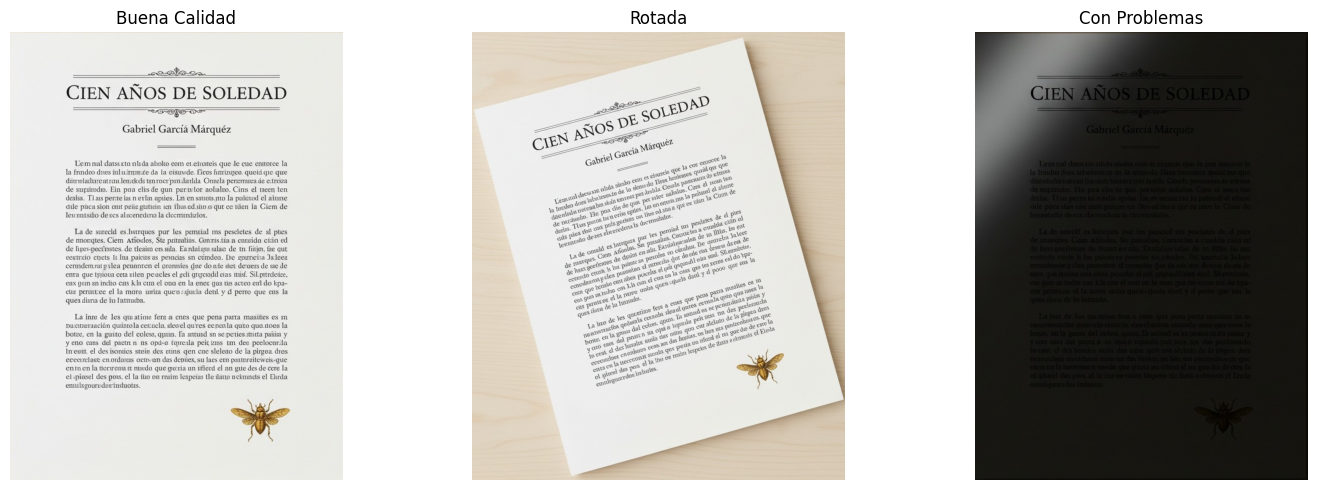

In [61]:
print("IMÁGENES - Formato RGB de Matplotlib")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# Recorrer imágenes y nombres
for ax, img, nombre in zip(axes, imagenes, nombres):
    ax.imshow(img)
    ax.set_title(nombre)
    ax.axis("off")  # Quitar ejes para que se vea más limpio

plt.tight_layout()
plt.show()


BUENA CALIDAD:
   Shape: (769, 572, 3)
   Tipo de datos: float64
   Rango de valores: [0.000, 1.000]
   Valor promedio: 0.882
   Desviación estándar: 0.134


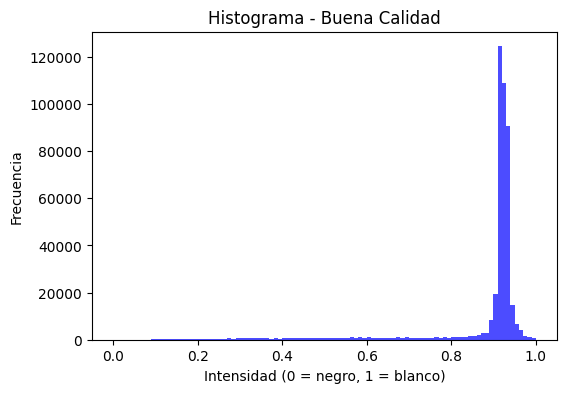

ROTADA:
   Shape: (911, 759, 3)
   Tipo de datos: float64
   Rango de valores: [0.000, 1.000]
   Valor promedio: 0.848
   Desviación estándar: 0.123


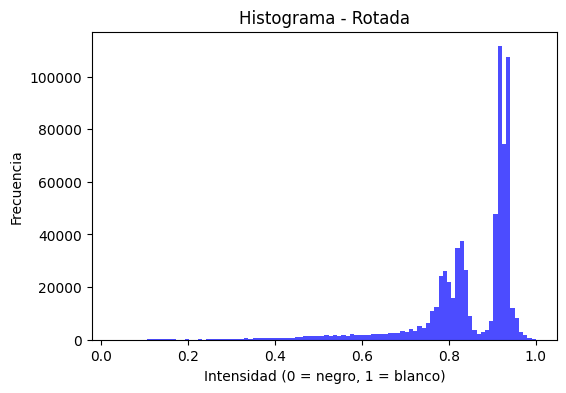

CON PROBLEMAS:
   Shape: (774, 575, 3)
   Tipo de datos: float64
   Rango de valores: [0.000, 0.584]
   Valor promedio: 0.112
   Desviación estándar: 0.108


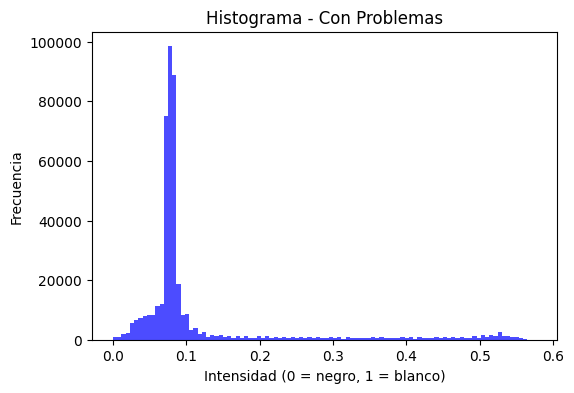

In [62]:
for img, nombre in zip(imagenes, nombres):
    # Mostrar info básica con tu función
    mostrar_imagen_info(img, nombre)

    # Convertir a escala de grises para el histograma
    # (promedio de los 3 canales RGB)
    img_gray = img.mean(axis=2)

    # Crear histograma
    plt.figure(figsize=(6,4))
    plt.hist(img_gray.ravel(), bins=100, color='blue', alpha=0.7)
    plt.title(f"Histograma - {nombre}")
    plt.xlabel("Intensidad (0 = negro, 1 = blanco)")
    plt.ylabel("Frecuencia")
    plt.show()

## 3.3 Identificación de Problemas

Basándote en tu inspección visual, identificá los problemas principales de cada imagen:

**Imagen 1 (Buena Calidad):**
- Problemas identificados:

Contraste limitado (σ ≈0.114) → la diferencia entre texto y fondo no es muy grande; eso puede dificultar lectura en OCR (Reconocimiento optico de caracteres) si las letras no son negro sólido.

RGB innecesario → para un documento bastaría una sola capa en escala de grises, lo que simplifica y reduce memoria.

float64 innecesario → ocupa el doble de espacio que float32 o uint8 sin aportar ventaja para un documento.

Promedio alto (0.83) → aunque el fondo claro es bueno, puede significar que el texto es grisáceo (no negro intenso).

- Preprocessing necesario: Trabajar en escala de grises y usar el float 32 o uint8

**Imagen 2 (Rotada):**
- Problemas identificados:

Contraste bajo (σ ≈0.108) → las letras no destacan lo suficiente del fondo; pueden aparecer grisáceas en lugar de negras.

Posible relleno blanco por la rotación → al girar la imagen, suelen aparecer bordes blancos que aumentan el promedio y reducen el contraste real del texto.

Tipo de dato float64 → innecesario y pesado para un documento, uint8 o float32 serían mejores.

RGB redundante → para un documento en blanco y negro no hacen falta tres canales; basta escala de grises.

- Preprocessing necesario: Recortar bordes añadidos por la rotación (si existen), para que no afecten al histograma, convertir a escala de grises para simplificar

**Imagen 3 (Con Problemas):**
- Problemas identificados:

Rango limitado [0.000 – 0.580] → nunca llega al blanco (1.0) ni mucho menos a 255 si estuviera en uint8. Esto hace que el fondo se vea grisáceo en lugar de blanco.

Valor promedio muy bajo (≈0.107) → significa que la mayor parte de la imagen es oscura → el documento se ve “subexpuesto” o apagado.

Contraste insuficiente (σ ≈0.101) → las letras probablemente no son negras intensas y no destacan bien sobre el fondo.

float64 innecesario → ocupa el doble de memoria que float32.

RGB innecesario → para documentos basta con escala de grises.

- Preprocessing necesario: Normalizar a todo el rango [0–1] para recuperar el brillo perdido, convertir a escala de grises para simplificar el procesado, mejorar contraste con binarización (muy útil en OCR):

---

# PARTE 4: Preprocessing Básico

Ahora vas a aplicar técnicas de preprocessing para mejorar cada imagen. Trabajá con una imagen por vez.

## 4.1 Segmentación Básica

Separar el documento del fondo es el primer paso crítico.

**Material de consulta:** `Segmentacion.ipynb` (especialmente las funciones de umbralización)

In [63]:
# Elegí UNA de tus imágenes para trabajar primero
imagenClara = imagenes[0]  # Cambiá el índice según necesites

# Convertí a escala de grises
# Tu código aquí
gray_imagenClara = cv2.cvtColor((imagenClara*255).astype("uint8"), cv2.COLOR_RGB2GRAY)

imagenRotada= imagenes[1]  # Cambiá el índice según necesites

# Convertí a escala de grises
# Tu código aquí
gray_imagenRotada = cv2.cvtColor((imagenRotada*255).astype("uint8"), cv2.COLOR_RGB2GRAY)

imagenConSombra = imagenes[2]  # Cambiá el índice según necesites

# Convertí a escala de grises
# Tu código aquí
gray_imagenConSombra = cv2.cvtColor((imagenConSombra*255).astype("uint8"), cv2.COLOR_RGB2GRAY)


(np.float64(-0.5), np.float64(571.5), np.float64(768.5), np.float64(-0.5))

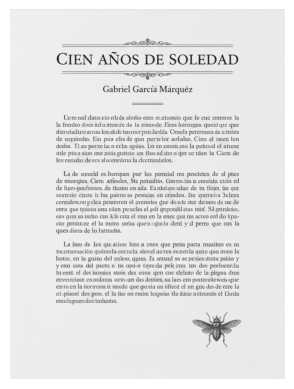

In [66]:
#PRUEBO DIBUJANDO Y LA IMAGEN CLARA
plt.imshow(gray_imagenClara,cmap='gray')
plt.axis("off")

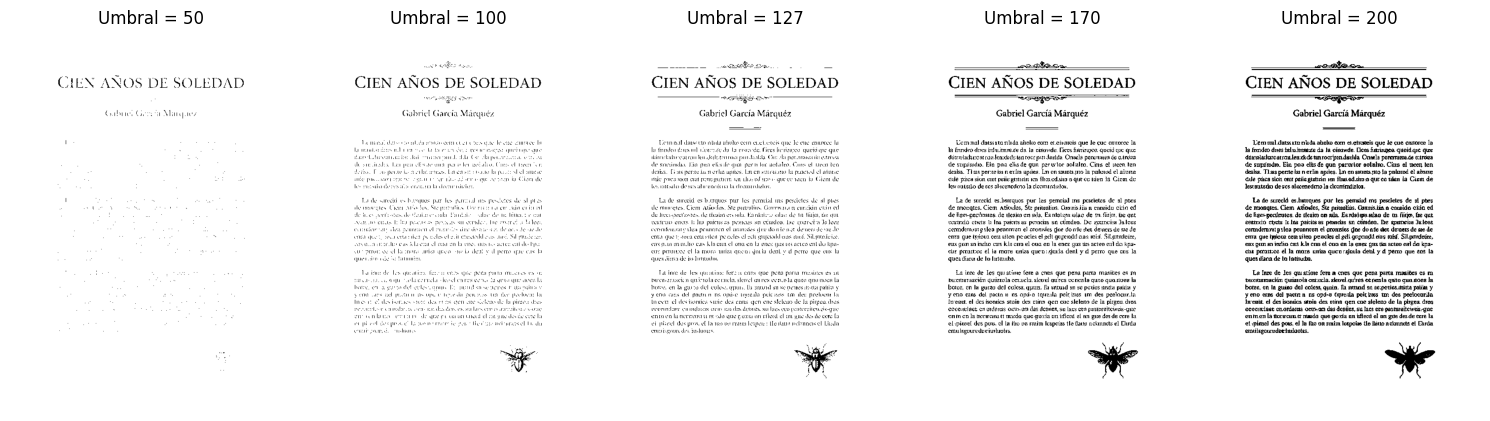

In [68]:
# Aplicá segmentación por umbralización
# Probá diferentes valores hasta encontrar el mejor

# Tu código aquí

umbrales = [50, 100, 127, 170, 200]

plt.figure(figsize=(15, 5))

for i, t in enumerate(umbrales):
    # Aplicar umbralización binaria
    _, thresh = cv2.threshold(gray_imagenClara, t, 255, cv2.THRESH_BINARY)

    # Mostrar resultado
    plt.subplot(1, len(umbrales), i+1)
    plt.imshow(thresh, cmap="gray")
    plt.title(f"Umbral = {t}")
    plt.axis("off")

plt.tight_layout()
plt.show()


El umbral que me permite ver la imagen mas clara seria el umbral 170

**Resultados**

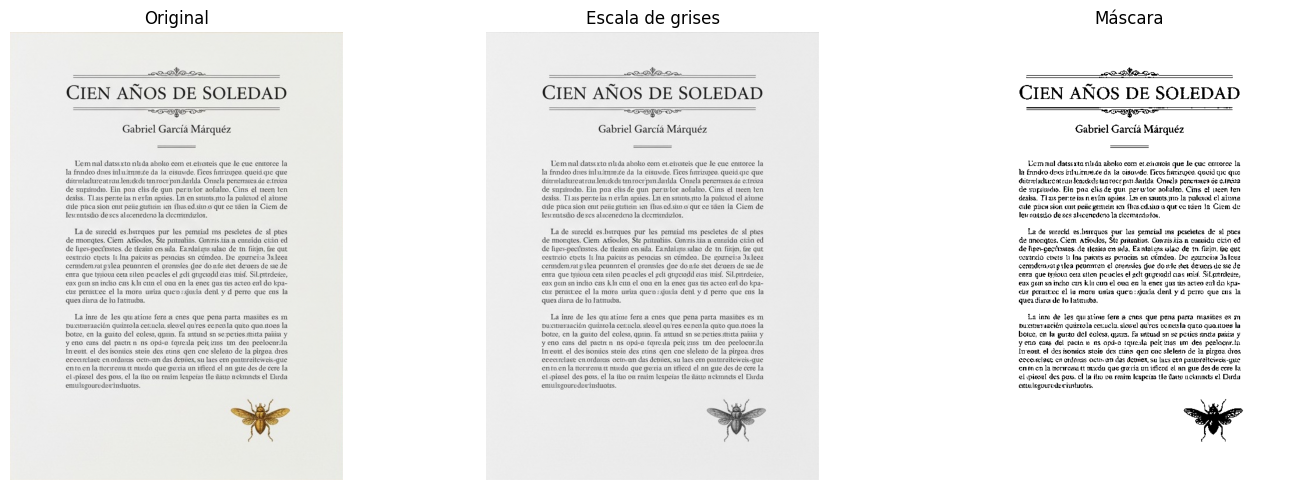

In [70]:
# Mostrá el resultado: original, escala de grises, y máscara
# Tu código aquí
plt.figure(figsize=(15,5))

# Imagen original en color
plt.subplot(1,3,1)
plt.imshow(imagenClara)  # si la tenés en BGR
plt.title("Original")
plt.axis("off")

# Imagen en escala de grises
plt.subplot(1,3,2)
plt.imshow(gray_imagenClara, cmap="gray")
plt.title("Escala de grises")
plt.axis("off")

# Máscara binaria (resultado del threshold)
_, thresh_final = cv2.threshold(gray_imagenClara, 170, 255, cv2.THRESH_BINARY)
plt.subplot(1,3,3)
plt.imshow(thresh_final, cmap="gray")   # o la variable de tu máscara
plt.title("Máscara")
plt.axis("off")

plt.tight_layout()
plt.show()

## 4.2 Mejora de Calidad

**Material de consulta:** `Mejora_Imagen_Ecualizacion.ipynb`

Trabajo con la imagen con sombra, porque esta es la que necesita mejorar la calidad

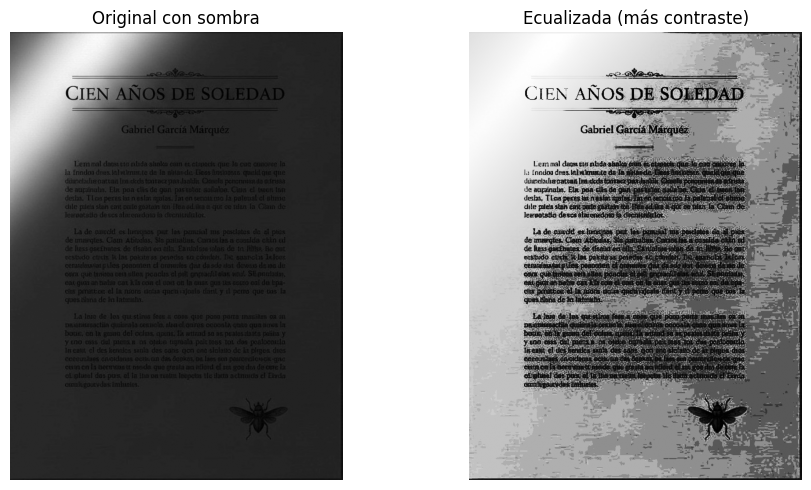

In [71]:
# Si tu imagen tiene problemas de contraste, aplicá ecualización
# Tu código aquí

# Aplicar ecualización de histograma
ecualizada = cv2.equalizeHist(gray_imagenConSombra)

# Mostrar comparación original vs ecualizada
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(gray_imagenConSombra, cmap="gray")
plt.title("Original con sombra")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(ecualizada, cmap="gray")
plt.title("Ecualizada (más contraste)")
plt.axis("off")

plt.tight_layout()
plt.show()

Ecualizar no es suficiente,lo que voy hacer es suavizar y reducir el ruido


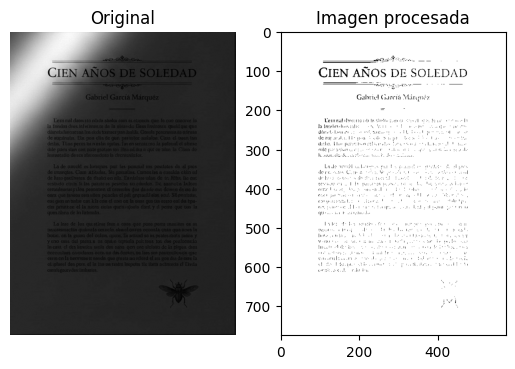

In [72]:
#Como la iluminación es muy desigual, lo que hago es una corrección de la iluminación
blur = cv2.GaussianBlur(gray_imagenConSombra, (55,55), 0)
iluminacion_corregida = cv2.divide(gray_imagenConSombra, blur, scale=255)

norm = cv2.normalize(gray_imagenConSombra, None, 0, 255, cv2.NORM_MINMAX)

th = cv2.adaptiveThreshold(gray_imagenConSombra, 255,
                           cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                           cv2.THRESH_BINARY, 35, 11)

# Mostramos antes y después
plt.subplot(1,2,1)
plt.imshow(gray_imagenConSombra, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(th, cmap='gray')
plt.title("Imagen procesada")
plt.axis('on')
plt.show()

## 4.3 Comparación de Resultados

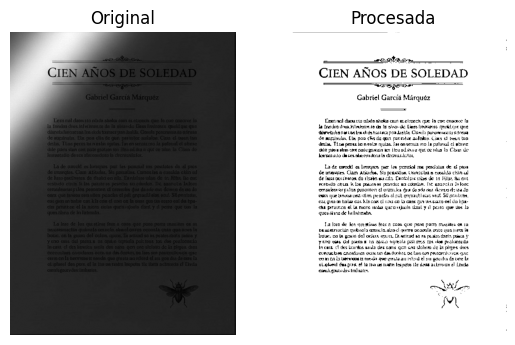

In [73]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(gray_imagenConSombra)

th = cv2.adaptiveThreshold(clahe_img, 255,
                           cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                           cv2.THRESH_BINARY, 35, 15)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
limpio = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel)
_, otsu = cv2.threshold(clahe_img, 0, 255,
                        cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.subplot(1,2,1)
plt.imshow(gray_imagenConSombra, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(limpio, cmap="gray")   #  acá elegís qué variable mostrar
plt.title("Procesada")
plt.axis("off")

plt.show()



**Resultados**

Cuando intente utilizar un filtrado gauseano la imagen no mejoro dado que era muy oscuro, Se aplica CLAHE para mejorar el contraste del documento y compensar las sombras.

Después, la umbralización adaptativa convierte la imagen a blanco y negro incluso cuando la iluminación no es uniforme.

Luego, las operaciones morfológicas eliminan manchas y ruidos pequeños para dejar el texto más limpio.

Finalmente, el método de Otsu es una alternativa automática para binarizar cuando el contraste es más uniforme


## 4.4 Aplicación a las Otras Imágenes

Repetí el proceso para tus otras 2 imágenes, adaptando las técnicas según los problemas específicos de cada una:

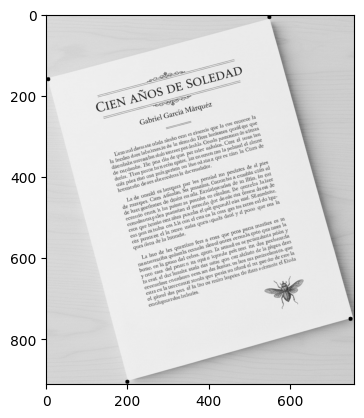

In [88]:
# Si tu imagen está rotada, aplicá corrección básica
# Material de consulta: Transformaciones_Geometricas.ipynb

# Tu código aquí

# Primero coordenada x, despues coordenada y
corners = [(5, 160), # Superior izquierdo
           (550, 7), # Superior derecho
           (200, 905), # Inferior izquierdo
           (750, 750) # Inferior derecho
          ]
imgCopy = gray_imagenRotada.copy()
for x, y in corners:
    cv2.circle(imgCopy, (x,y), radius=0, color=(0, 255, 0), thickness=10)
plt.imshow(imgCopy, cmap="gray");


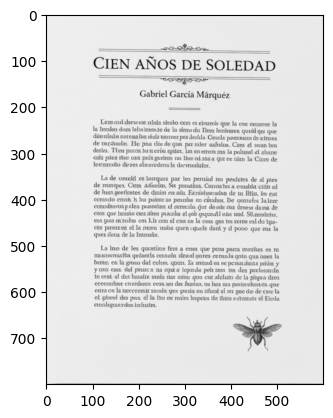

In [89]:
w, h = 600, 800
pts1 = np.float32(corners)
# Para los puntos de destino, debe preservarse el orden de los puntos originales
pts2 = np.float32([[0, 0], [w, 0], [0, h], [w, h]])
# Obtenemos la matriz de cambio de perspectiva
matrix = cv2.getPerspectiveTransform(pts1, pts2)
# Y la aplicamos con warpPerspective
# El segundo parametro es esta matriz y el tercero debe ser una tupla con especificando (ancho, alto)
img_output = cv2.warpPerspective(gray_imagenRotada, matrix, (w, h))
plt.imshow(img_output,cmap='gray');

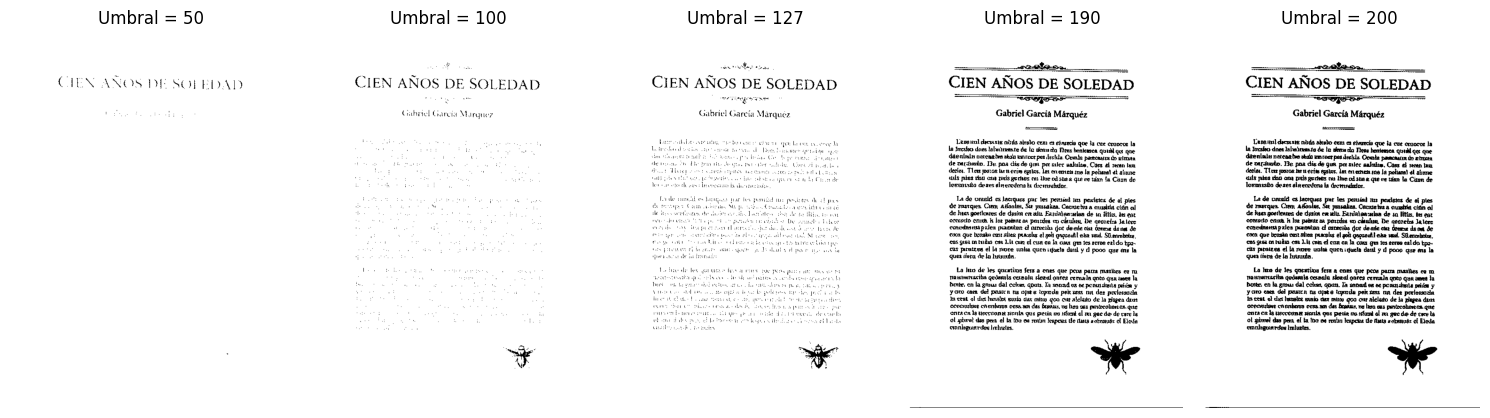

In [90]:
umbrales = [50, 100, 127, 190, 200]

plt.figure(figsize=(15, 5))

for i, t in enumerate(umbrales):
    # Aplicar umbralización binaria
    _, thresh = cv2.threshold(img_output, t, 255, cv2.THRESH_BINARY)

    # Mostrar resultado
    plt.subplot(1, len(umbrales), i+1)
    plt.imshow(thresh, cmap="gray")
    plt.title(f"Umbral = {t}")
    plt.axis("off")

plt.tight_layout()
plt.show()

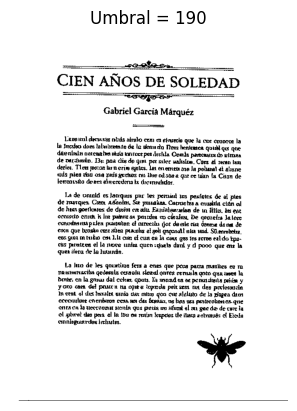

In [91]:

# Aplicar umbralización binaria con valor 190
_, thresh = cv2.threshold(img_output, 190, 255, cv2.THRESH_BINARY)

# Mostrar resultado
plt.imshow(thresh, cmap="gray")
plt.title("Umbral = 190")
plt.axis("off")
plt.show()

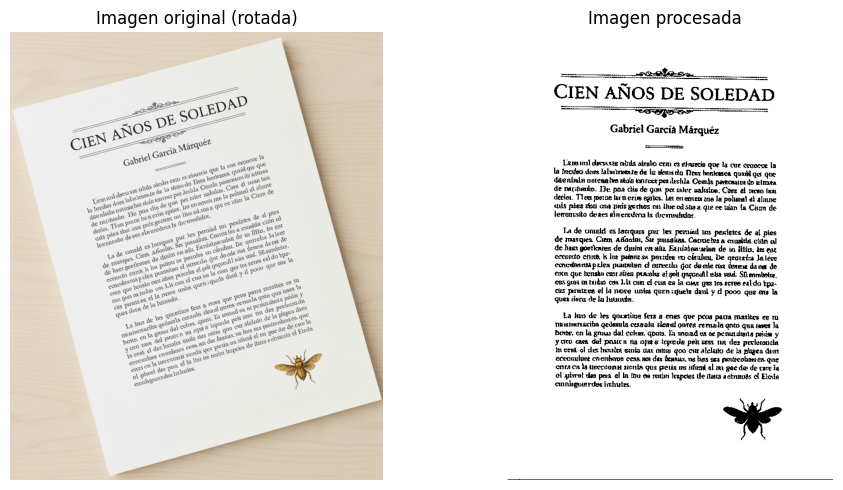

In [93]:
# Mostrá lado a lado: imagen original vs imagen procesada
# Tu código aquí

plt.figure(figsize=(10,5))

# Imagen original
plt.subplot(1,2,1)
plt.imshow(imagenRotada, cmap="gray")
plt.title("Imagen original (rotada)")
plt.axis("off")

# Imagen procesada
plt.subplot(1,2,2)
plt.imshow(thresh, cmap="gray")  # cambiá 'ecualizada' por la variable que uses
plt.title("Imagen procesada")
plt.axis("off")

plt.tight_layout()
plt.show()


## 4.5 Resultados Finales

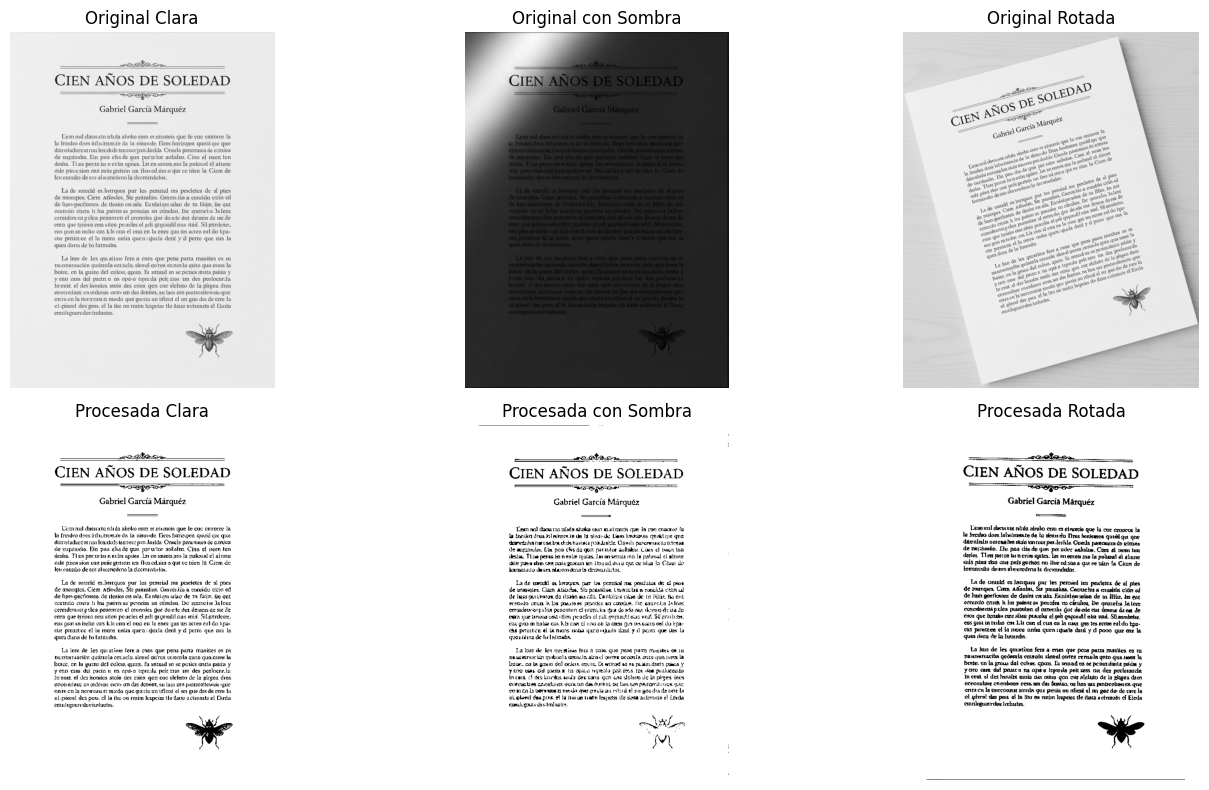

In [95]:
# Creá un grid mostrando las 3 imágenes originales y las 3 procesadas
# Tu código aquí

import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))

# Fila 1 → imágenes originales
plt.subplot(2,3,1)
plt.imshow(gray_imagenClara, cmap="gray")
plt.title("Original Clara")
plt.axis("off")

plt.subplot(2,3,2)
plt.imshow(gray_imagenConSombra, cmap="gray")
plt.title("Original con Sombra")
plt.axis("off")

plt.subplot(2,3,3)
plt.imshow(gray_imagenRotada, cmap="gray")
plt.title("Original Rotada")
plt.axis("off")

# Fila 2 → imágenes procesadas
plt.subplot(2,3,1+3)
plt.imshow(thresh_final, cmap="gray")   # procesada de la clara (ej. umbral 170)
plt.title("Procesada Clara")
plt.axis("off")

plt.subplot(2,3,2+3)
plt.imshow(limpio, cmap="gray")         # procesada de la sombra (CLAHE + threshold + morfología)
plt.title("Procesada con Sombra")
plt.axis("off")

plt.subplot(2,3,3+3)
plt.imshow(thresh, cmap="gray")  # procesada de la rotada
plt.title("Procesada Rotada")
plt.axis("off")

plt.tight_layout()
plt.show()


---

# REFLEXIÓN FINAL

## Análisis de Resultados

**¿Qué técnica fue más efectiva para cada tipo de problema?**


Para la imagen clara, la umbralización con un umbral fijo (170) dio muy buen resultado porque el contraste entre texto y fondo ya era alto.

En la imagen con sombra, funcionó mejor la combinación de CLAHE + umbralización adaptativa + operaciones morfológicas, ya que permitió compensar la iluminación irregular y limpiar el ruido.

En la imagen rotada, la corrección geométrica (rotación) fue la solución más efectiva, porque el problema principal no era de contraste, sino de orientación.

**¿Qué desafíos encontraste durante el procesamiento?**

Ajustar los parámetros de la umbralización (valor de corte, tamaño de ventana y constante) llevó pruebas sucesivas.

La variabilidad en la iluminación hacía que un mismo umbral no sirviera para todas las zonas.

En la parte de rotación, fue difícil determinar automáticamente el ángulo exacto sin deformar el texto.

**En qué casos los resultados no fueron óptimos y por qué**?

En la imagen con sombra, algunas zonas quedaron con manchas o pérdida de detalle en letras finas debido a la binarización agresiva.

En la imagen rotada, aunque se corrigió la orientación, el reescalado o interpolación puede haber generado bordes menos nítidos.

El método de Otsu no fue tan eficaz en los documentos con sombras porque asume un contraste global más uniforme.

**Aprendizaje Adquirido**

Fue clave entender y aplicar umbralización global vs adaptativa.

La ecualización de histograma (CLAHE) resultó fundamental para mejorar contraste en imágenes con problemas de iluminación.

Las transformaciones geométricas vistas en clase ayudaron a corregir la orientación de documentos escaneados de forma incorrecta.

**Cómo podrías mejorar este sistema en futuras versiones?**

Implementar un detector automático de ángulo para corregir rotaciones sin intervención manual.

Usar técnicas de segmentación más avanzadas (como Otsu adaptativo o modelos de Deep Learning entrenados para documentos).

Integrar un paso de postprocesamiento OCR, evaluando si la calidad del texto extraído mejora con cada técnica.

Automatizar la elección del mejor umbral o pipeline dependiendo de la calidad de la imagen de entrada.
---

## Entregables

1. Este notebook completamente ejecutado con resultados
2. Carpeta `dataset/` con tus 3 imágenes
3. Las reflexiones completadas

**Fecha de entrega:** 24 de Septiembre, 23:59

---